# 01a02c Function 1-Manifold Toy Datasets

> Collections of 1-Manifold toy datasets in 3 dimensional space generated from a function in xy-plane

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'nbdev'

In [ ]:
# collapse
from FRED.datasets import plot_directed_2d, plot_directed_3d, xy_tilt, add_noise, generate_prism

We first introduce a helper function that generate a 1-manifold in 3d space given any function $y = f(x)$ and its derivative $y' = f'(x)$.

In [ ]:
# export
def directed_one_variable_function(func, deriv, xlow, xhigh, num_nodes=100, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along a one variable function.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    func : function, y = func(x)
        An one variable function
    deriv : function, y' = deriv(x)
        The derivative of func
    xlow : float
        Lower bound of x
    xlow : float
        Upper bound of x
    num_nodes : int, default=100
        Number of data points in shape.

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    # positions
    x = np.random.uniform(xlow, xhigh, num_nodes)
    x = np.sort(x)
    y = func(x)
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    labels = x
    # vectors
    u = np.ones(num_nodes)
    v = deriv(x)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

## Sine

We sample $x$ uniformly along a range, compute $y = \sin(x)$ and compute the direction and strength of the flow at each point using the derivative $y' = \cos(x)$.

In [ ]:
# export
def directed_sine(num_nodes=500, xscale=1, yscale=1, xlow=-2*np.pi, xhigh=2*np.pi, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along a sine function.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    xscale : float, default=1
        Factor to stretch the x-axis
    yscale : float, default=1
        Factor to stretch the y-axis
    xlow : float, default=-2*pi
        Lower bound of x
    xlow : float, default=2*pi
        Upper bound of x

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    X, flows, labels = directed_one_variable_function(
        lambda x: np.sin(x / xscale) * yscale, 
        lambda x: np.cos(x / xscale) / xscale * yscale, 
        xlow, xhigh, 
        num_nodes, xtilt, ytilt, sigma, inverse
    )
    return X, flows, labels

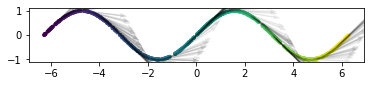

In [ ]:
# collapse
X, flows, labels = directed_sine()
plot_directed_2d(X, flows, labels)

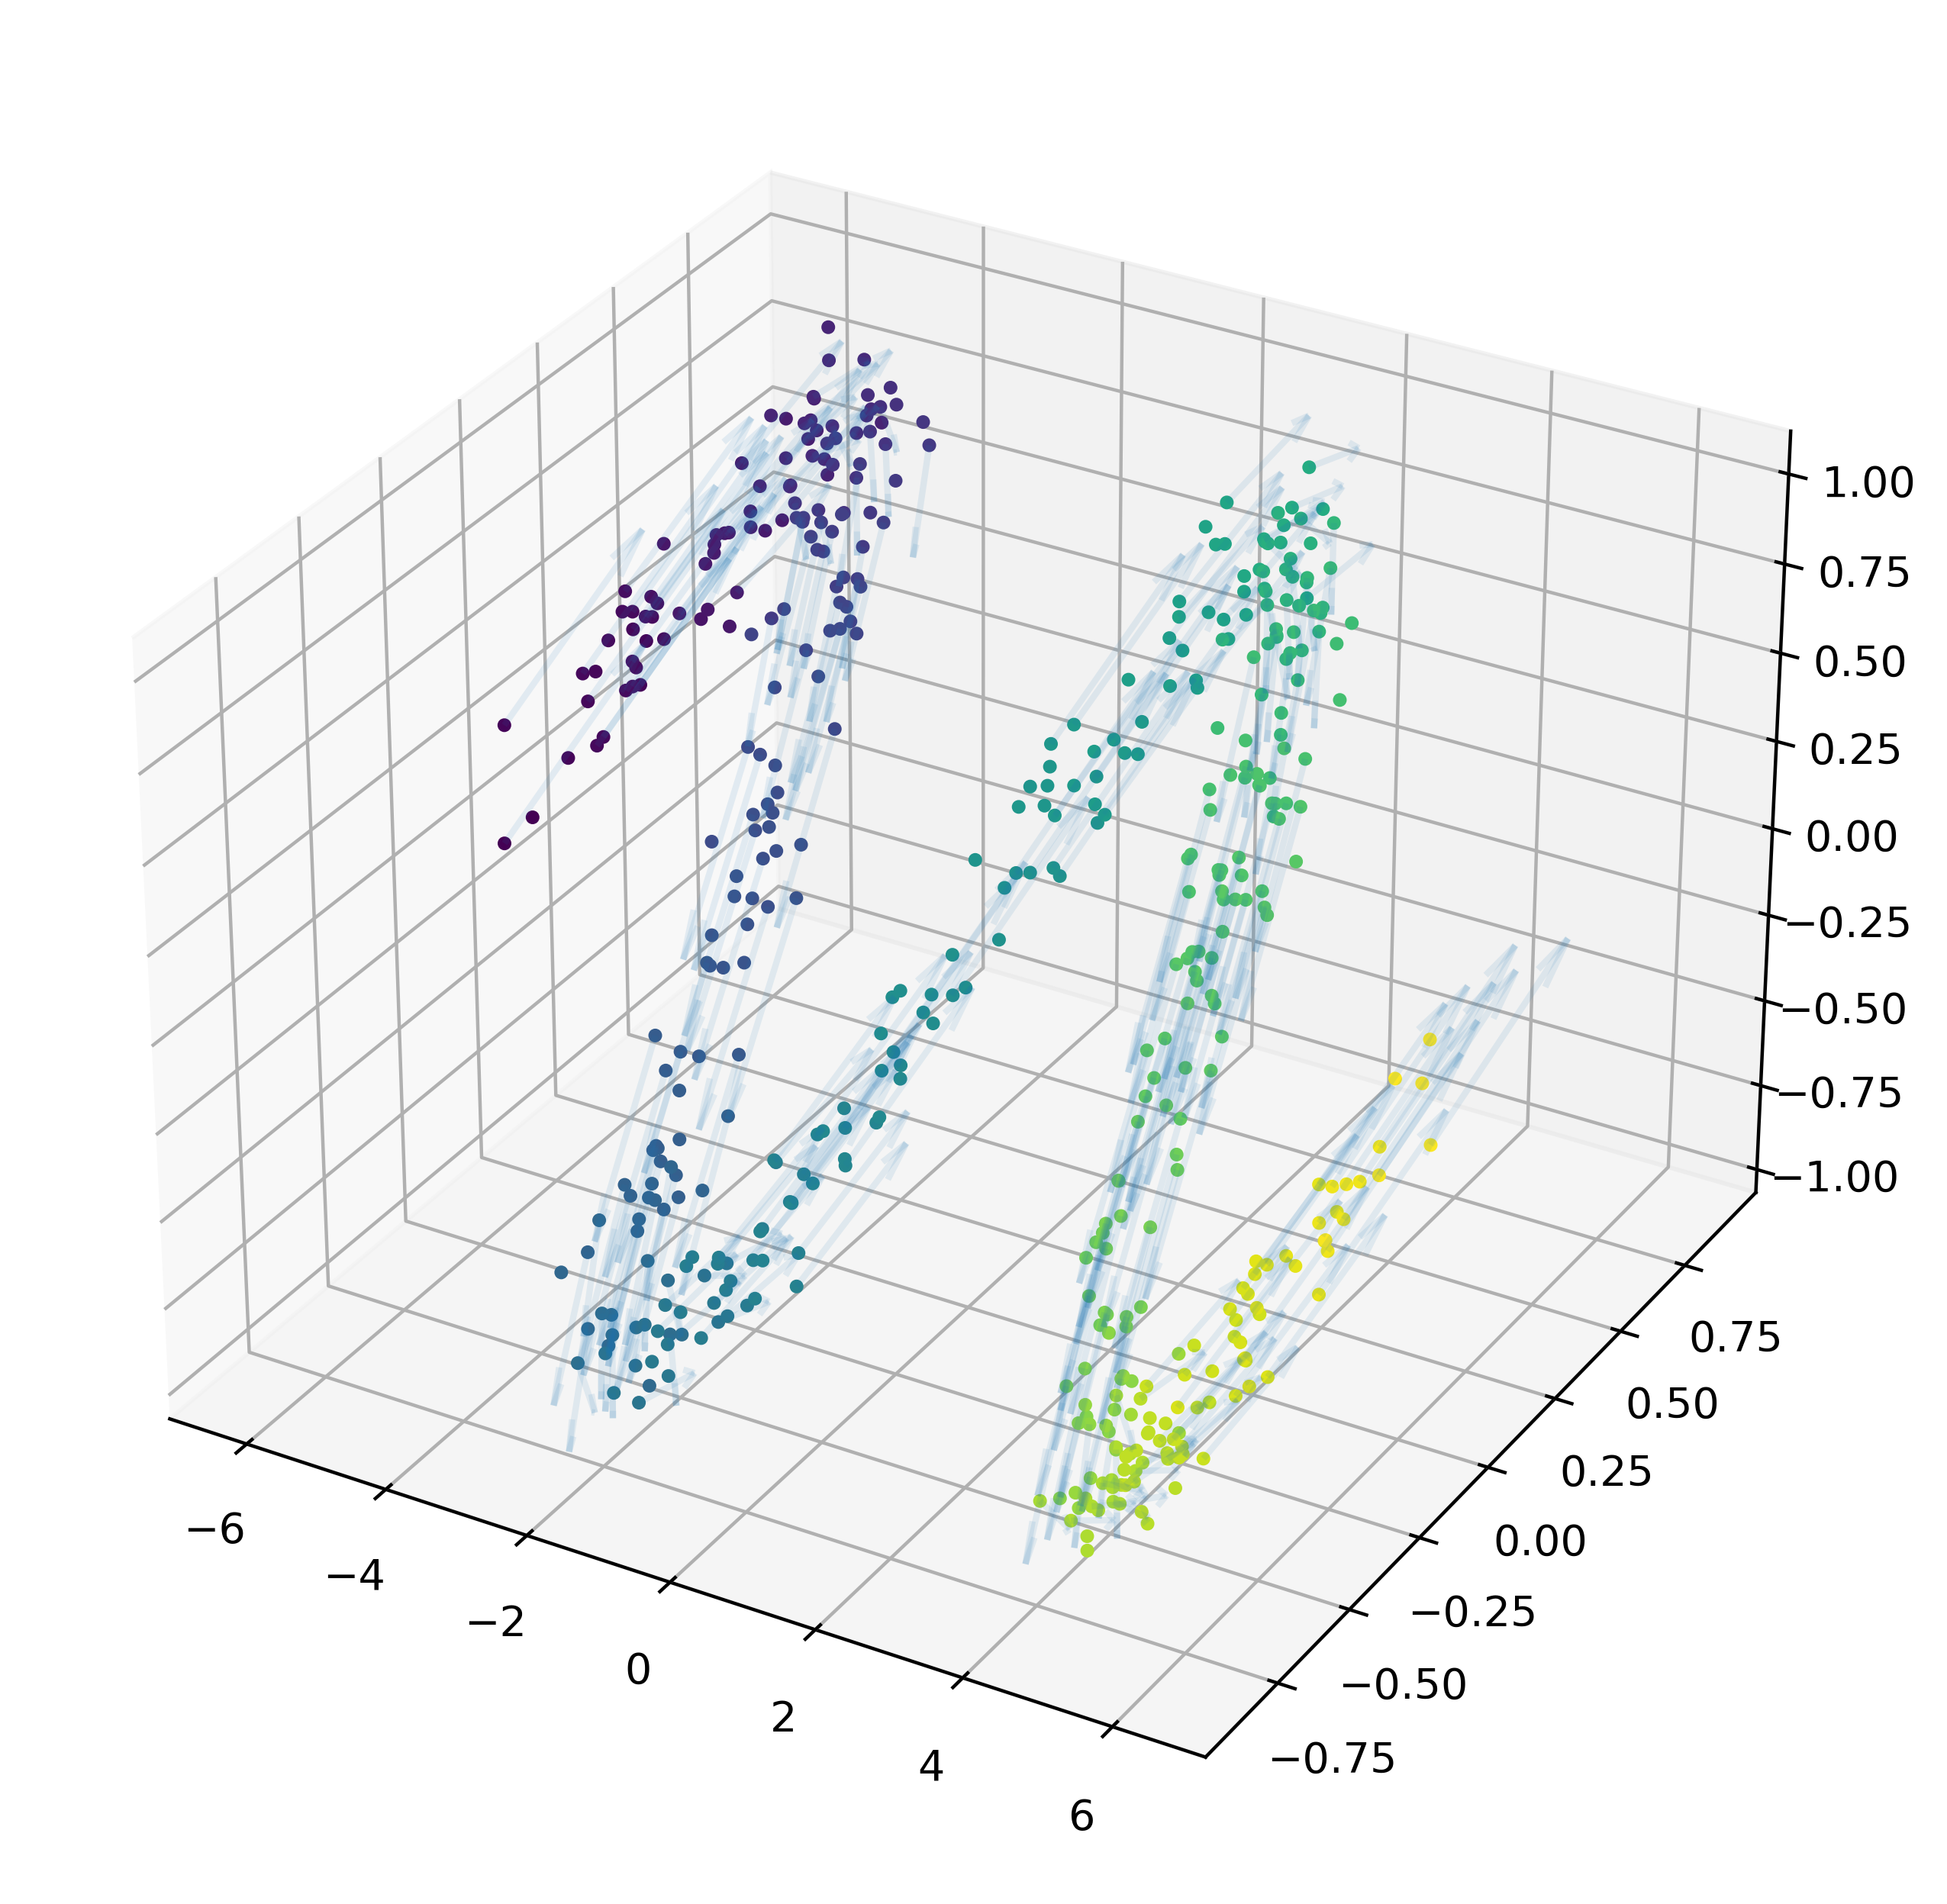

In [ ]:
# collapse
X, flows, labels = directed_sine(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels)

## Sine Ribbons

We simply generate a prism from `directed_sine`.

In [ ]:
# export
def directed_sine_ribbon(num_nodes=1000, xscale=1, yscale=1, xlow=-2*np.pi, xhigh=2*np.pi, height=20, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along a sine function with height.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=1000
        Number of data points in shape.
    xscale : float, default=1
        Factor to stretch the x-axis
    yscale : float, default=1
        Factor to stretch the y-axis
    xlow : float, default=-2*pi
        Lower bound of x
    xlow : float, default=2*pi
        Upper bound of x
    height : float, default=20
        Height of the ribbon

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    X, flows, labels = directed_sine(num_nodes, xscale, yscale, xlow, xhigh, xtilt, ytilt, sigma, inverse)
    X = generate_prism(num_nodes, X, height)
    return X, flows, labels

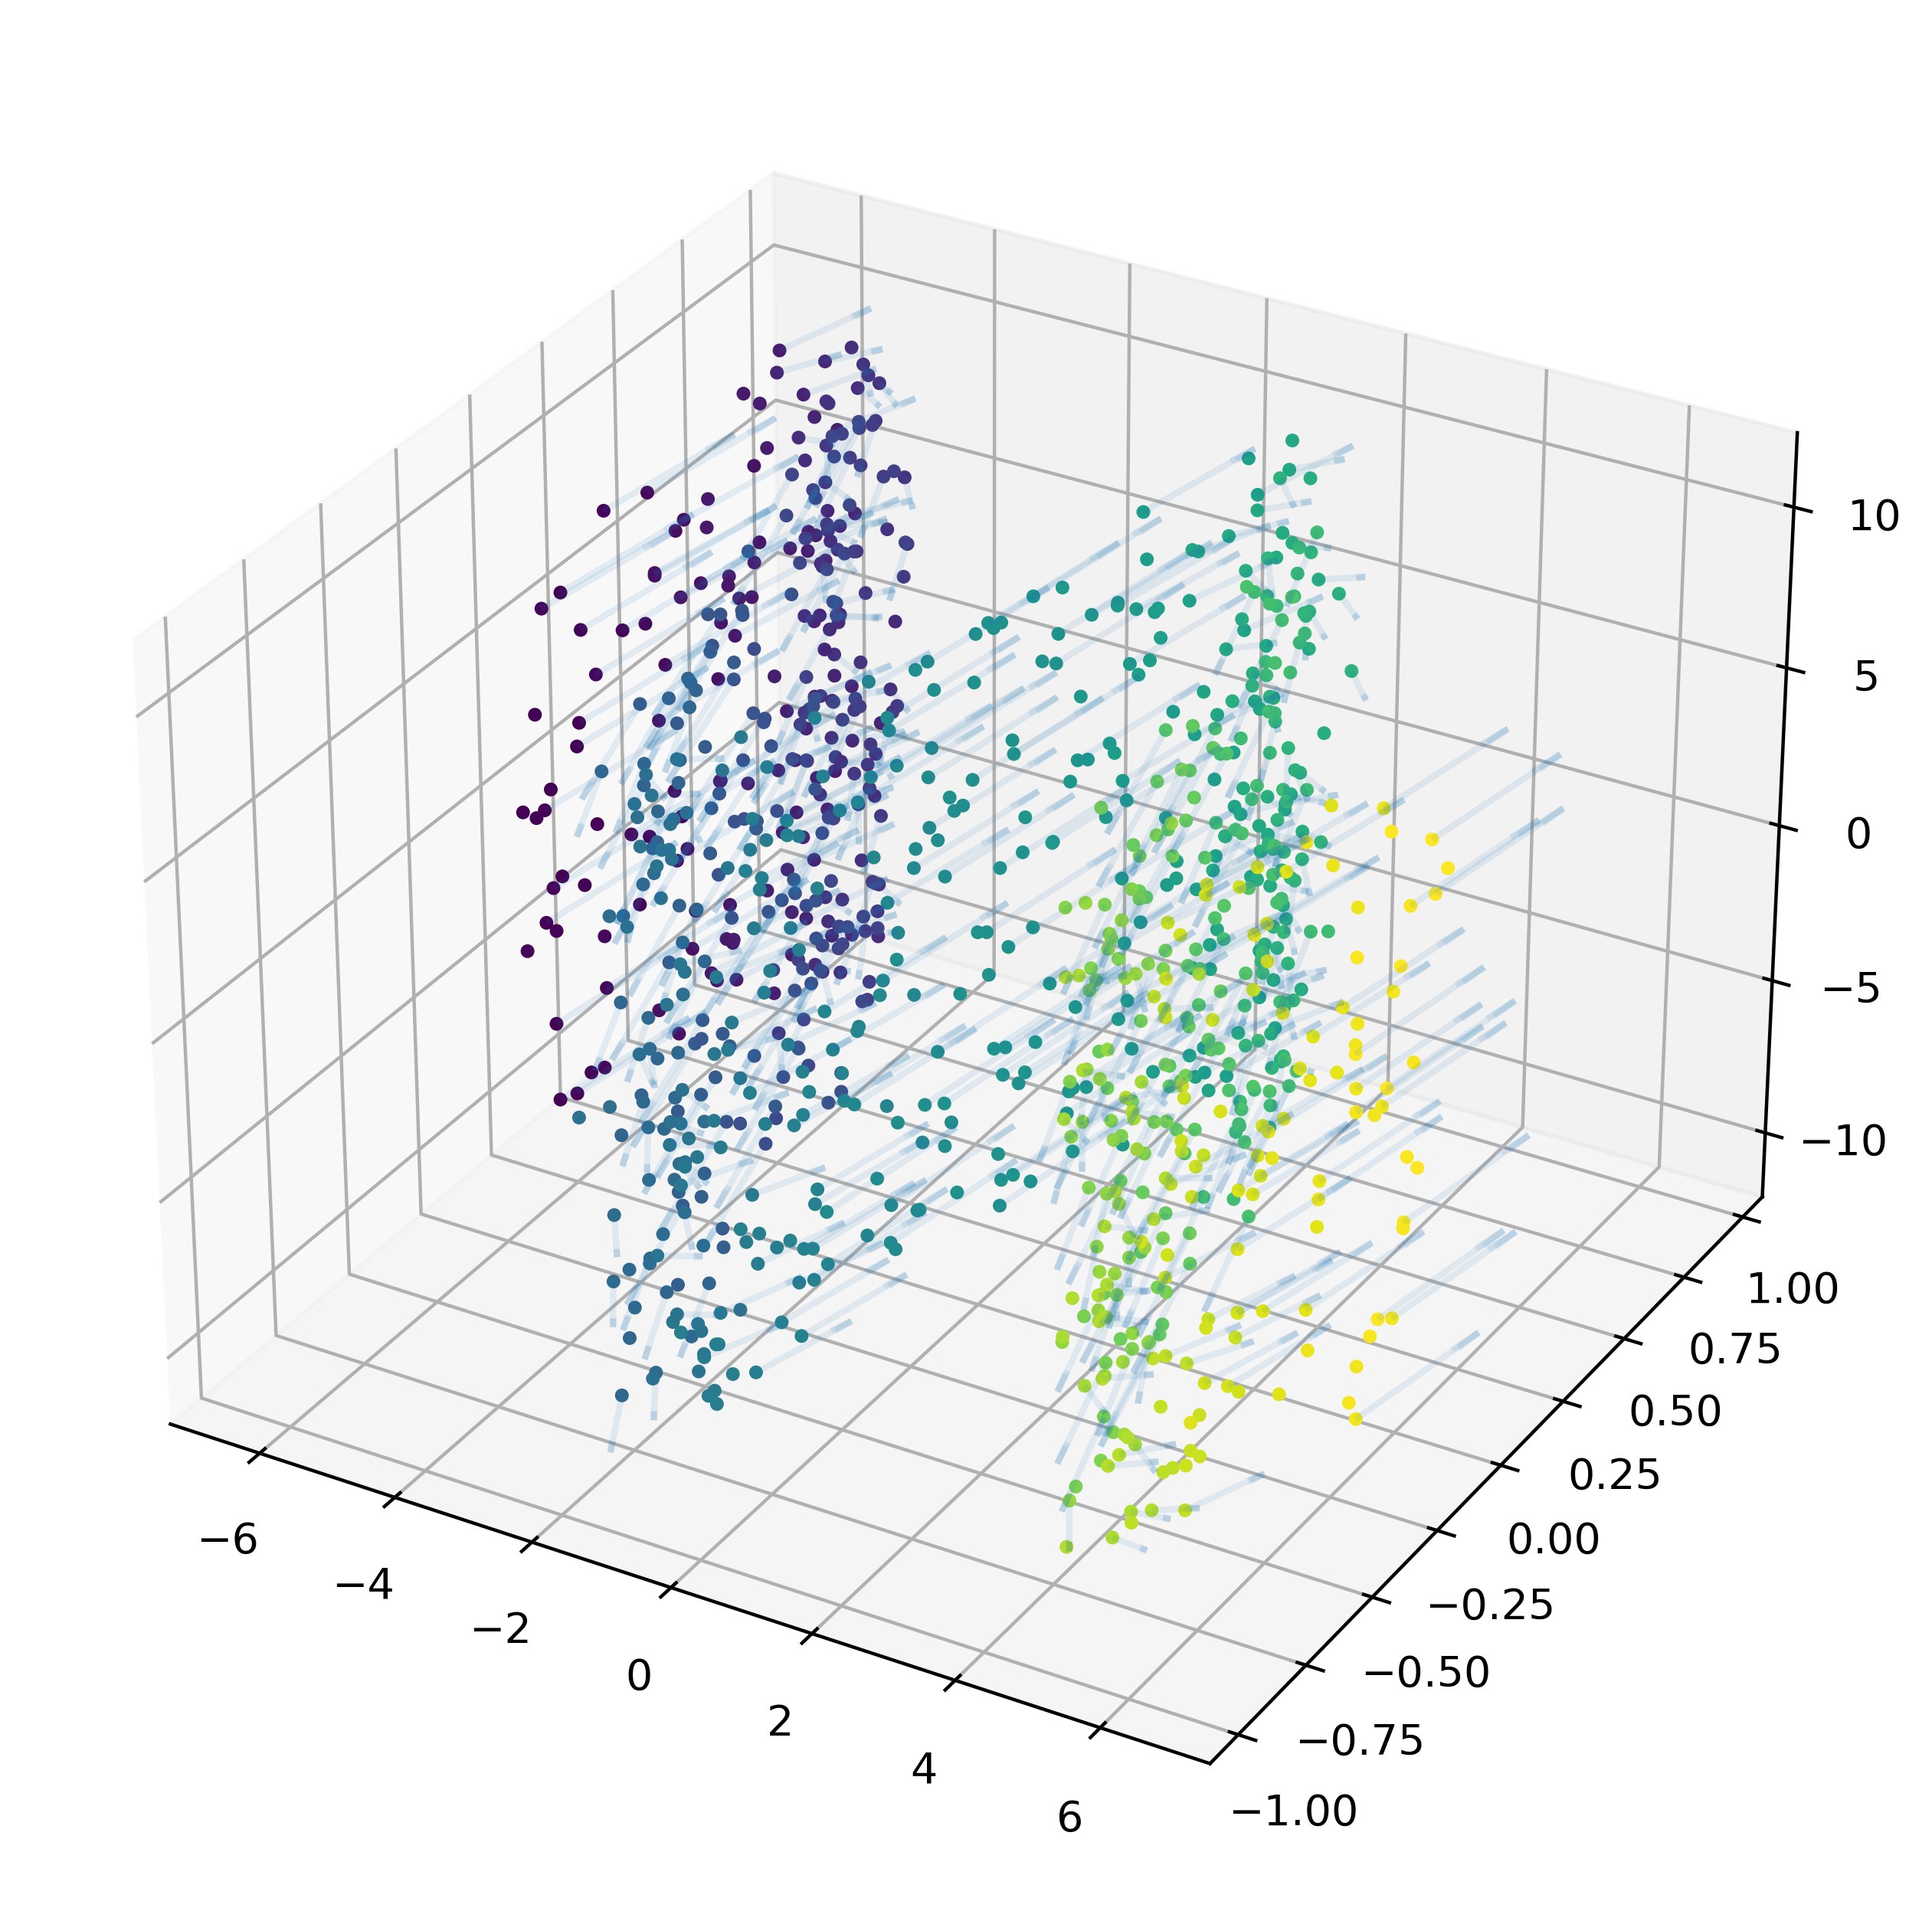

In [ ]:
# collapse
X, flows, labels = directed_sine_ribbon(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels)

## Sinh Branch

First, we write `directed_sinh` by sampling $x$ uniformly along a range, compute $y = \sinh(x)$ and compute the direction and strength of the flow at each point using the derivative $y' = \cosh(x)$.

Then, we sample from a 2-branch manifold by combining $\sinh(x)$ between $-0.84 \pi$ and $0.84 \pi$ with the $\sin(x)$ between $0$ and $2\pi$.

In [ ]:
# export
def directed_sinh(num_nodes=500, xscale=1, yscale=1, xlow=-2*np.pi, xhigh=2*np.pi, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along a sinh function.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    xscale : float, default=1
        Factor to stretch the x-axis
    yscale : float, default=1
        Factor to stretch the y-axis
    xlow : float, default=-2*pi
        Lower bound of x
    xlow : float, default=2*pi
        Upper bound of x

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    X, flows, labels = directed_one_variable_function(
        lambda x: np.sinh(x / xscale) * yscale, 
        lambda x: np.cosh(x / xscale) / xscale * yscale, 
        xlow, xhigh, 
        num_nodes, xtilt, ytilt, sigma, inverse
    )
    return X, flows, labels

In [ ]:
# export
def directed_sinh_branch(num_nodes=1000, xscale=1, yscale=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along a sinh-sine branch.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=1000
        Number of data points in shape.
    xscale : float, default=1
        Factor to stretch the x-axis
    yscale : float, default=1
        Factor to stretch the y-axis

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    num_nodes_per_branch = num_nodes//3
    X_root, flows_root, labels_root = directed_sinh(num_nodes-2*num_nodes_per_branch, xscale, yscale, -xscale*np.pi*0.84, 0, xtilt, ytilt, sigma, inverse)
    X_branch1, flows_branch1, labels_branch1 = directed_sinh(num_nodes_per_branch, xscale, yscale, 0, xscale*np.pi*0.84, xtilt, ytilt, sigma, inverse)
    X_branch2, flows_branch2, labels_branch2 = directed_sine(num_nodes_per_branch, xscale, yscale, 0, xscale*np.pi*2, xtilt, ytilt, sigma, inverse)
    # concatenate
    X = np.concatenate((X_root, X_branch1, X_branch2))
    flows = np.concatenate((flows_root, flows_branch1, flows_branch2))
    labels = np.concatenate((labels_root - np.pi*3, labels_branch1, labels_branch2 + np.pi*3))
    return X, flows, labels


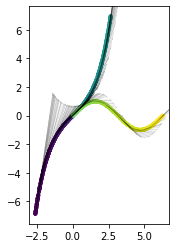

In [ ]:
# collapse
X, flows, labels = directed_sinh_branch()
plot_directed_2d(X, flows, labels)

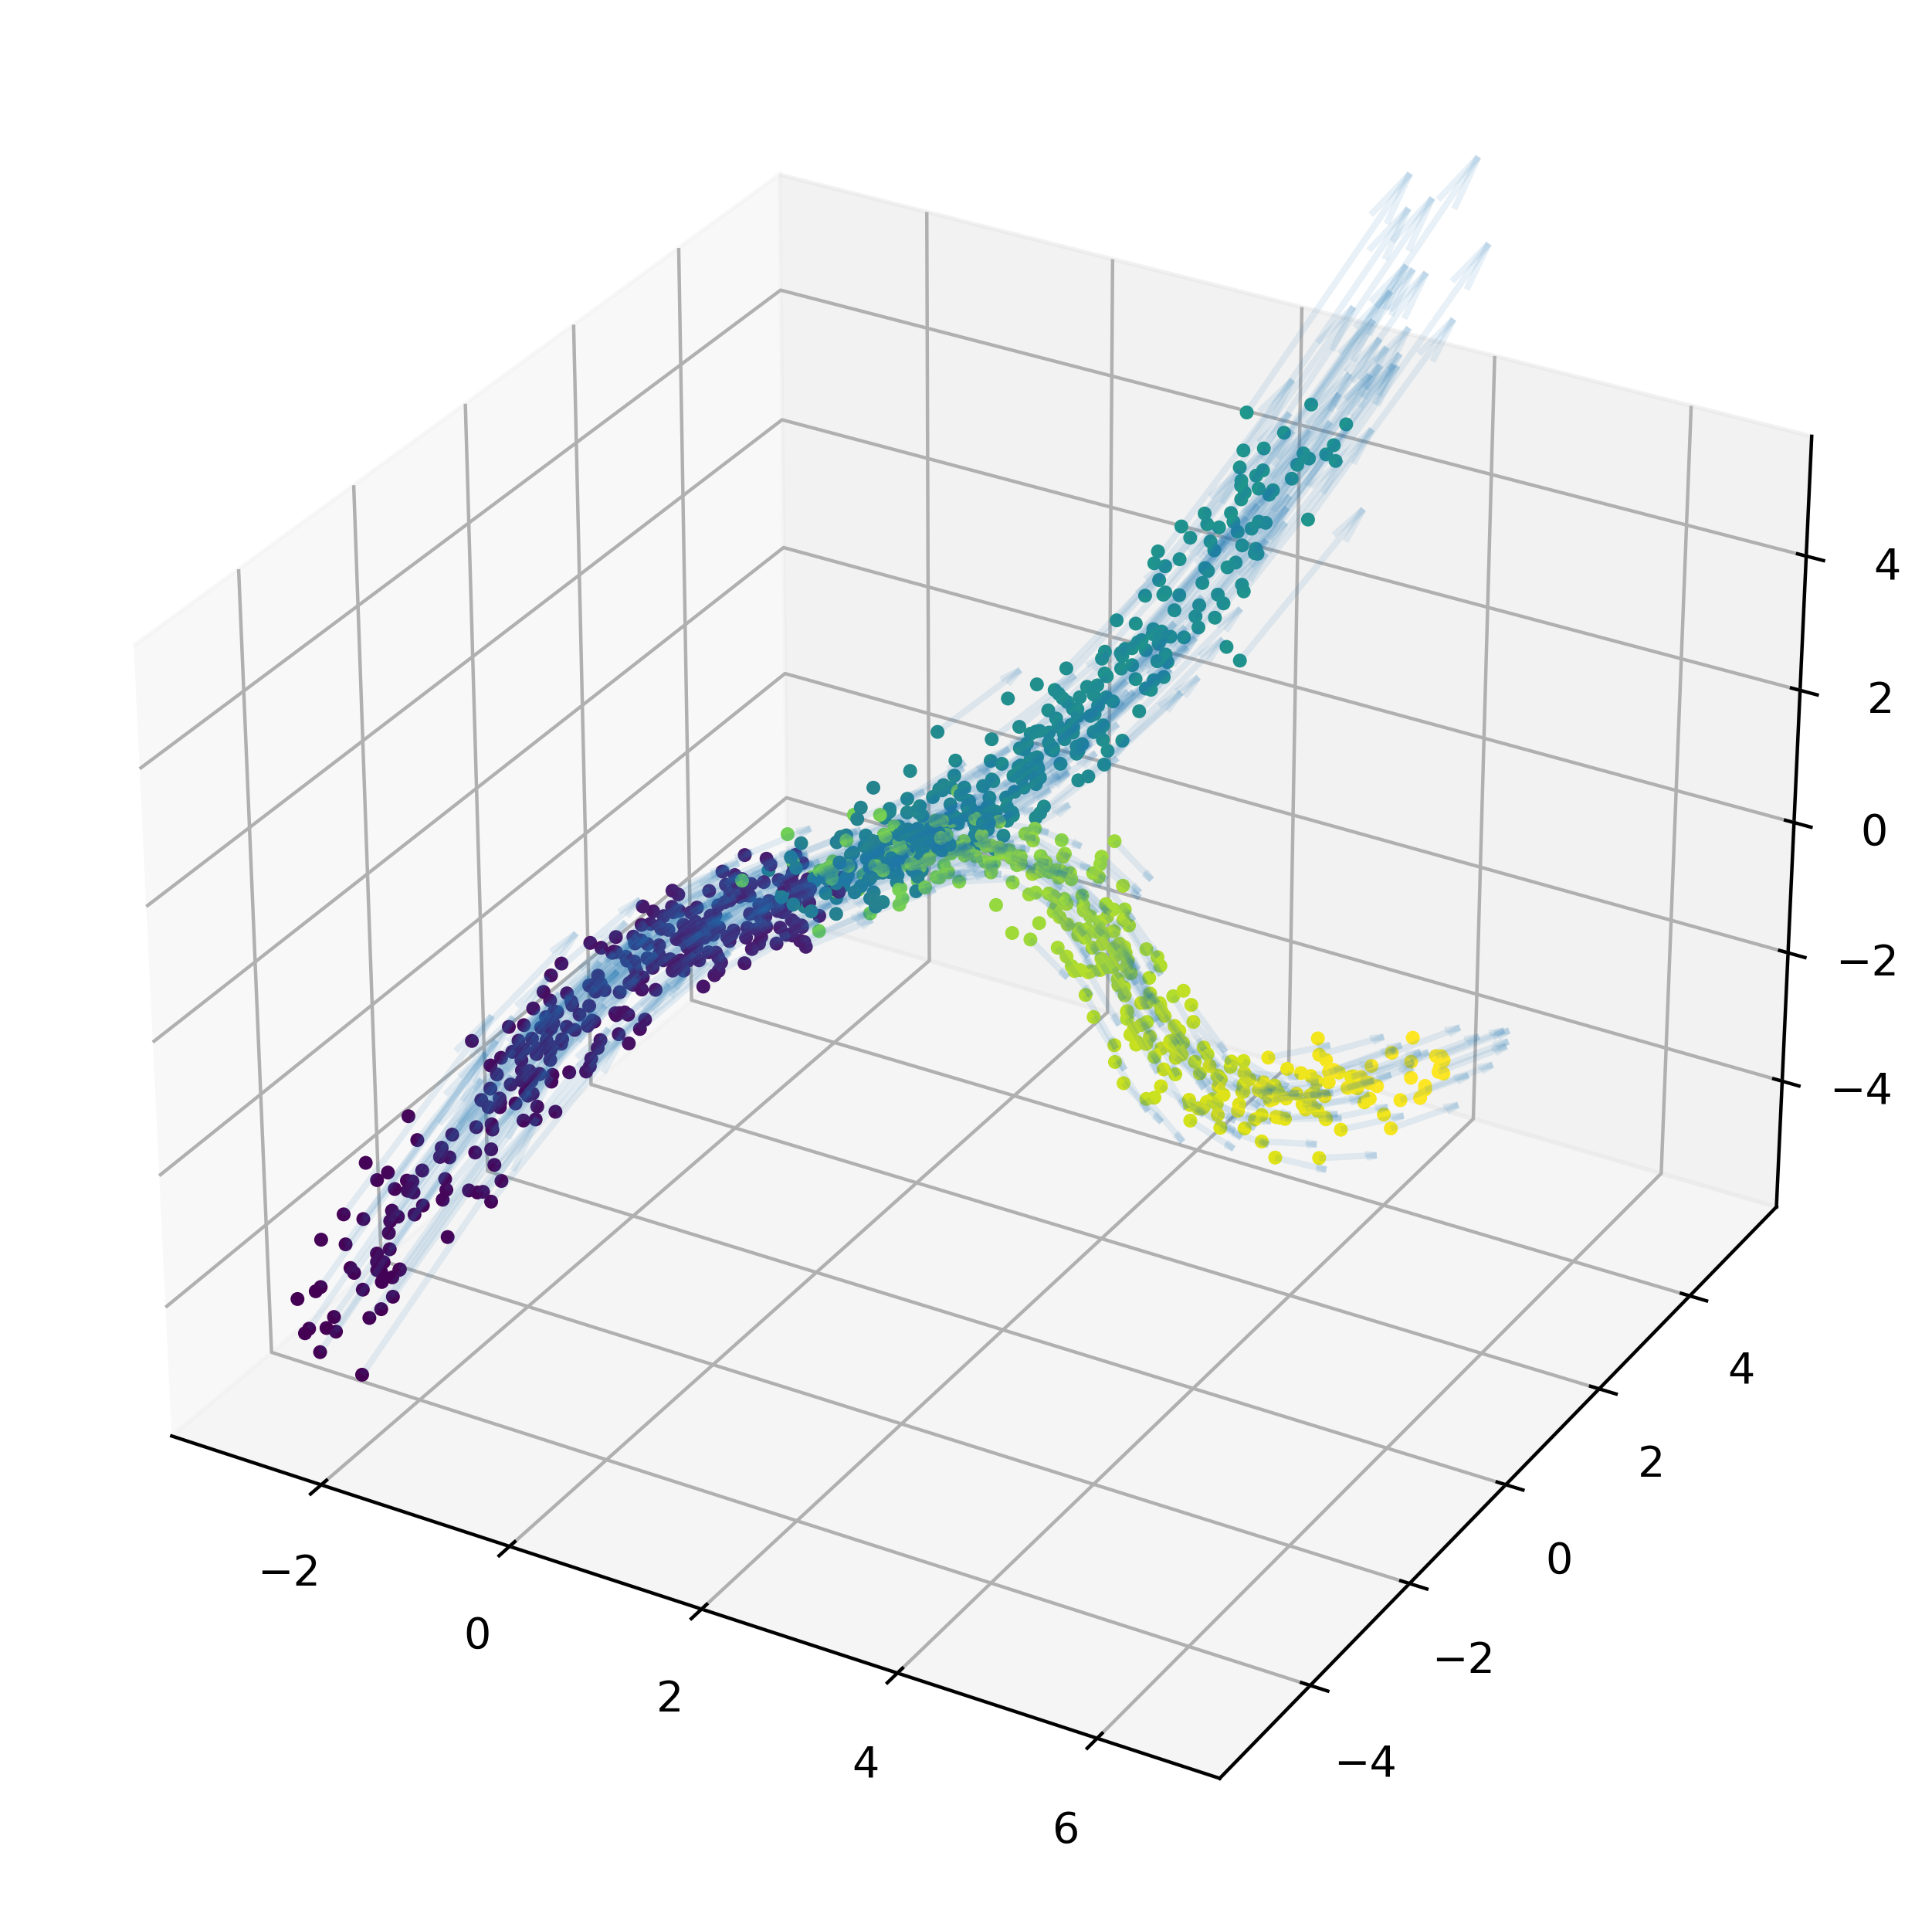

In [ ]:
# collapse
X, flows, labels = directed_sinh_branch(xtilt=np.pi/4, sigma=0.25)
plot_directed_3d(X, flows, labels)

## Moons

We combine 2 $\sin(x)$ sections and add an offset along the y-axis to one section to generate 2 moons that are interconnected.

In [ ]:
# export
def directed_sine_moons(num_nodes=500, xscale=1, yscale=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample data points along two sine moons.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    xscale : float, default=1
        Factor to stretch the x-axis
    yscale : float, default=1
        Factor to stretch the y-axis

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    num_nodes_per_moon = num_nodes // 2
    X_moon1, flows_moon1, labels_moon1 = directed_sine(num_nodes_per_moon, xscale, yscale, 0, xscale*np.pi, xtilt, ytilt, sigma, inverse)
    X_moon2, flows_moon2, labels_moon2 = X, flows, labels = directed_one_variable_function(
        lambda x: np.cos(x / xscale) * yscale + 0.3, 
        lambda x: -np.sin(x / xscale) / xscale * yscale, 
        xscale*np.pi/2, xscale*np.pi*3/2, 
        num_nodes_per_moon, xtilt, ytilt, sigma, inverse
    )
    # concatenate
    X = np.concatenate((X_moon1, X_moon2))
    flows = np.concatenate((flows_moon1, flows_moon2))
    labels = np.concatenate((labels_moon1 - np.pi, labels_moon2))
    return X, flows, labels

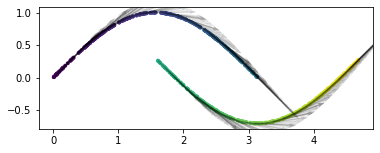

In [ ]:
# collapse
X, flows, labels = directed_sine_moons()
plot_directed_2d(X, flows, labels)

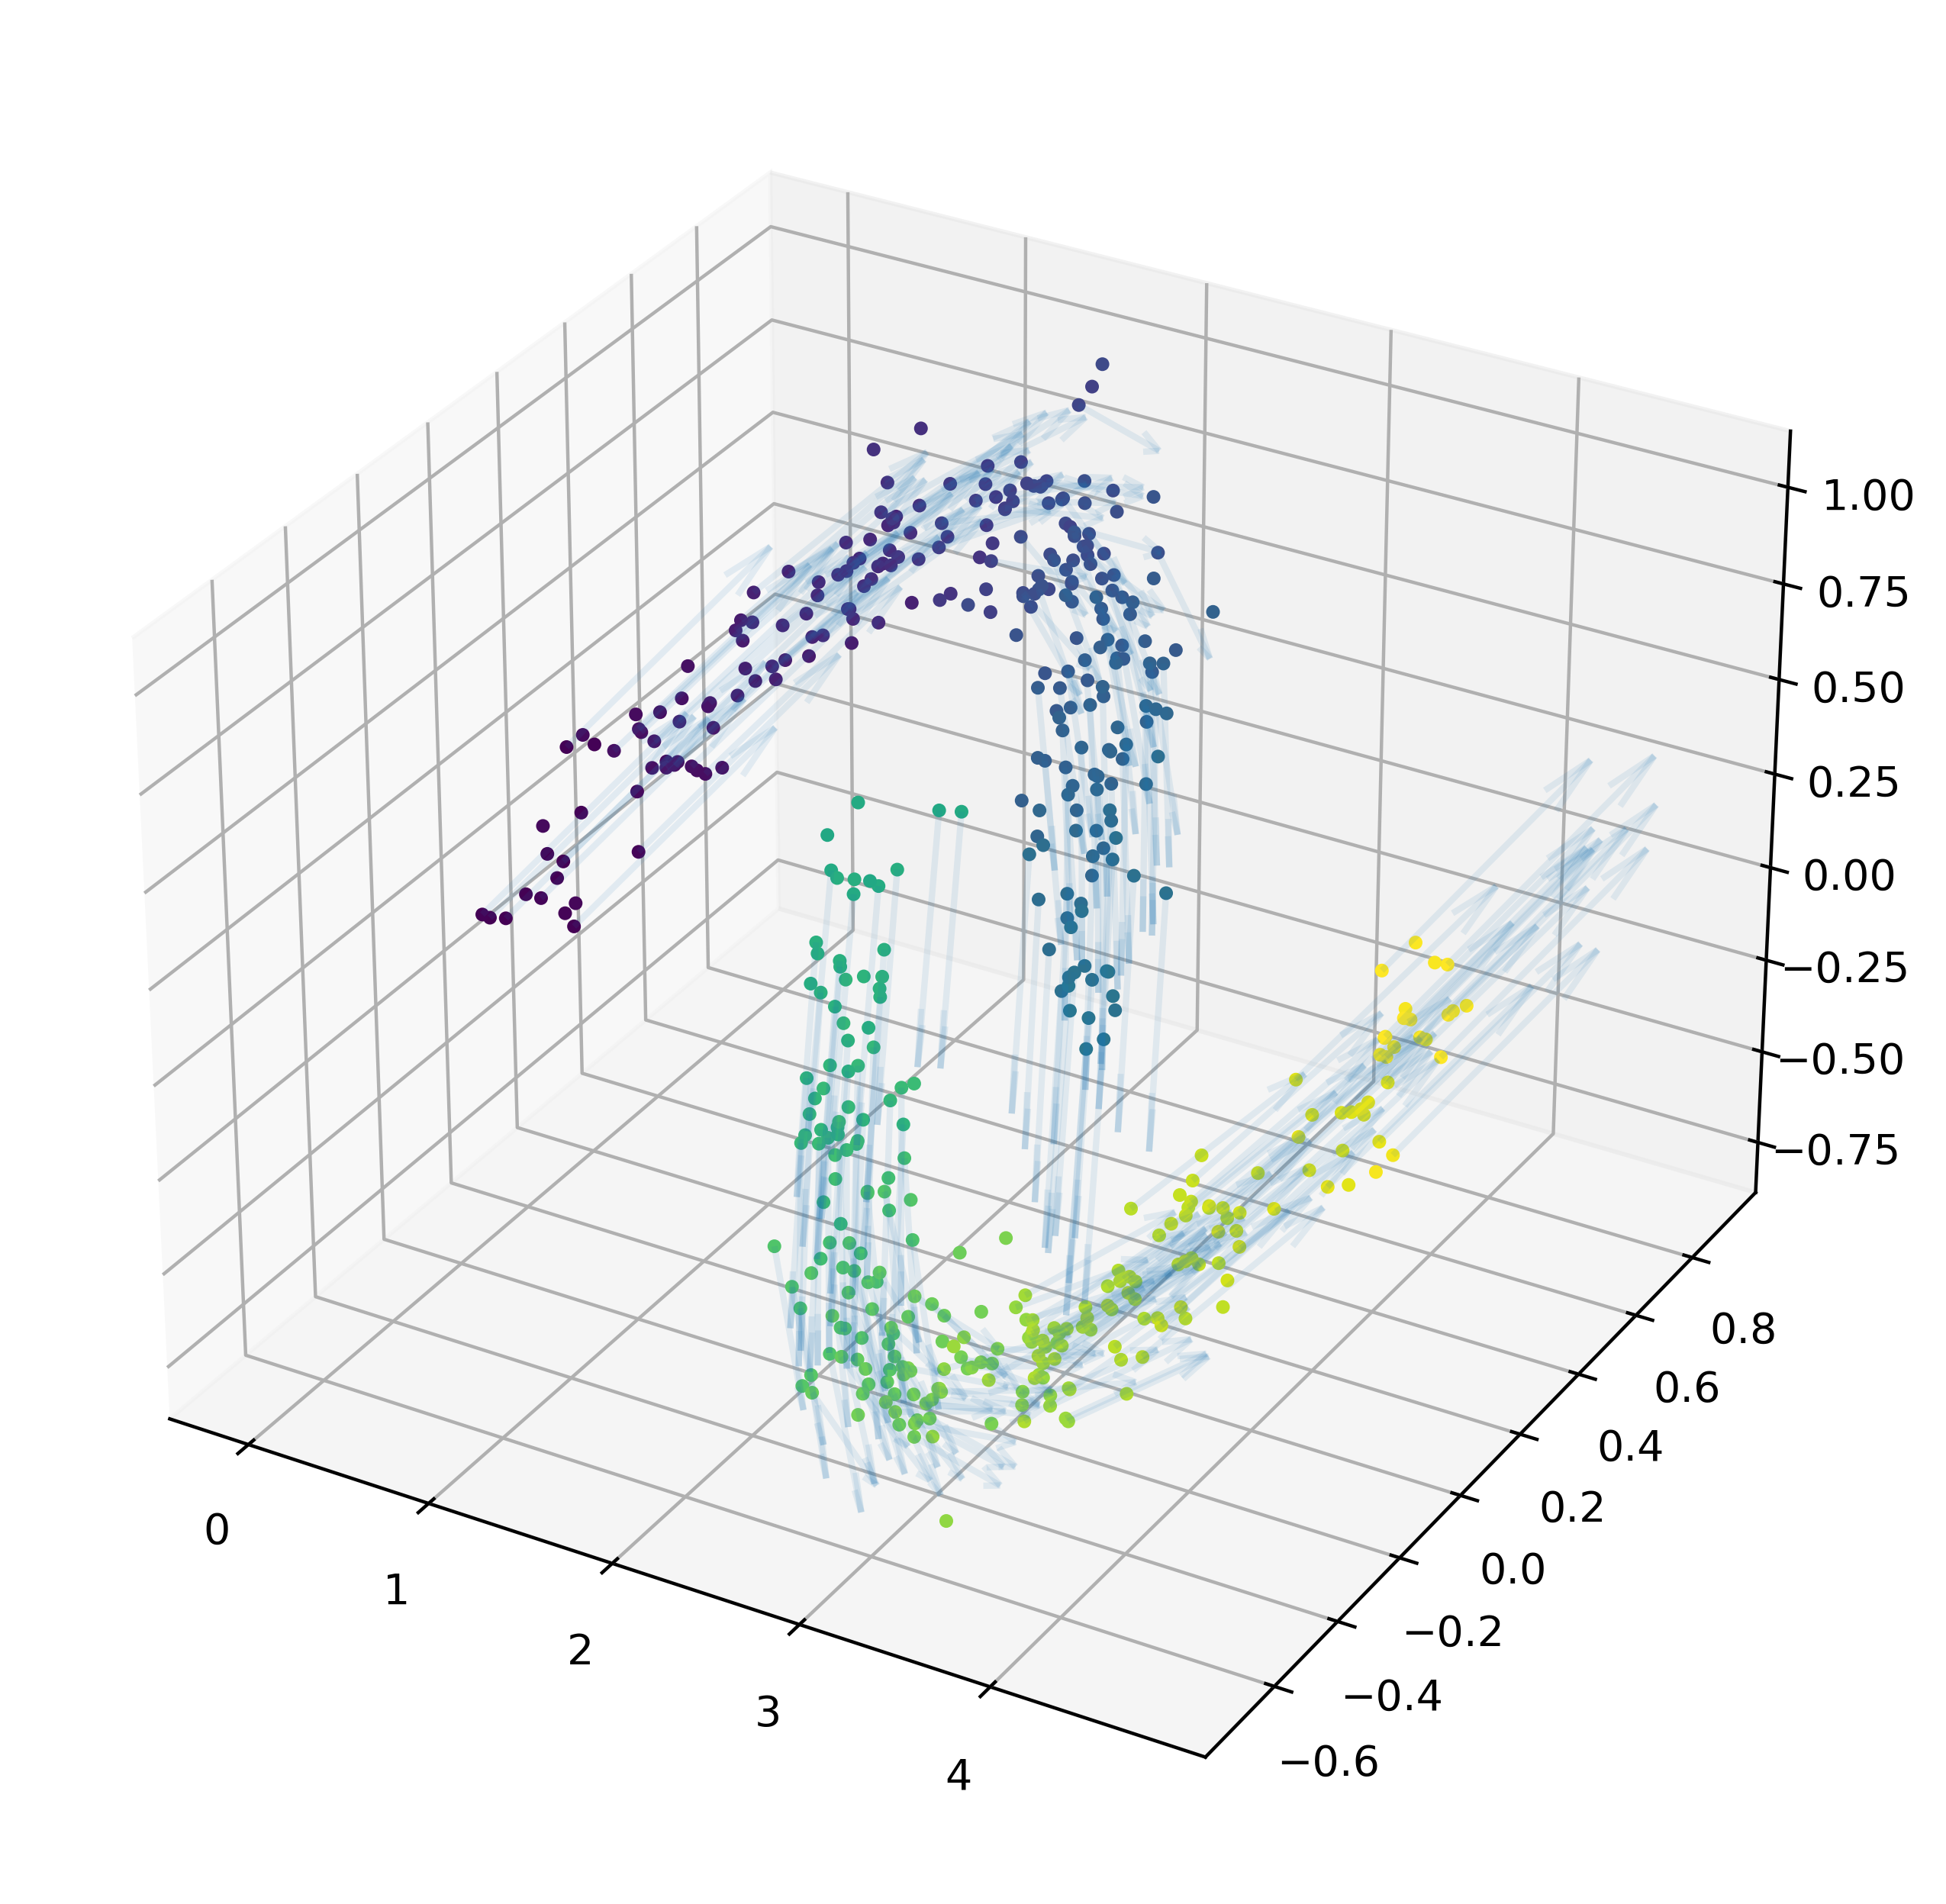

In [ ]:
# collapse
X, flows, labels = directed_sine_moons(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels)

## Line with Discontinuities

In [ ]:
# export
def line_with_discontinuities(num_nodes = 1000, x_tilt = 0.3, y_tilt = 0.9):
    X1 = np.vstack([np.linspace(-1,-0.001,num_nodes//2), np.zeros(num_nodes//2), np.zeros(num_nodes//2)]).T
    X2 = np.vstack([np.linspace(0.001,1,num_nodes//2), np.zeros(num_nodes//2), np.zeros(num_nodes//2)]).T
    X = np.vstack([X1,X2])
    flows = np.vstack([1/np.sign(X[:,0]), np.zeros(len(X)), np.zeros(len(X))]).T
    labels = np.concatenate([np.zeros(num_nodes//2),np.ones(num_nodes//2)])
    X, flows = xy_tilt(X, flows, xtilt = x_tilt, ytilt = y_tilt)
    return X, flows, labels

In [ ]:
X, flows, labels = line_with_discontinuities(200)

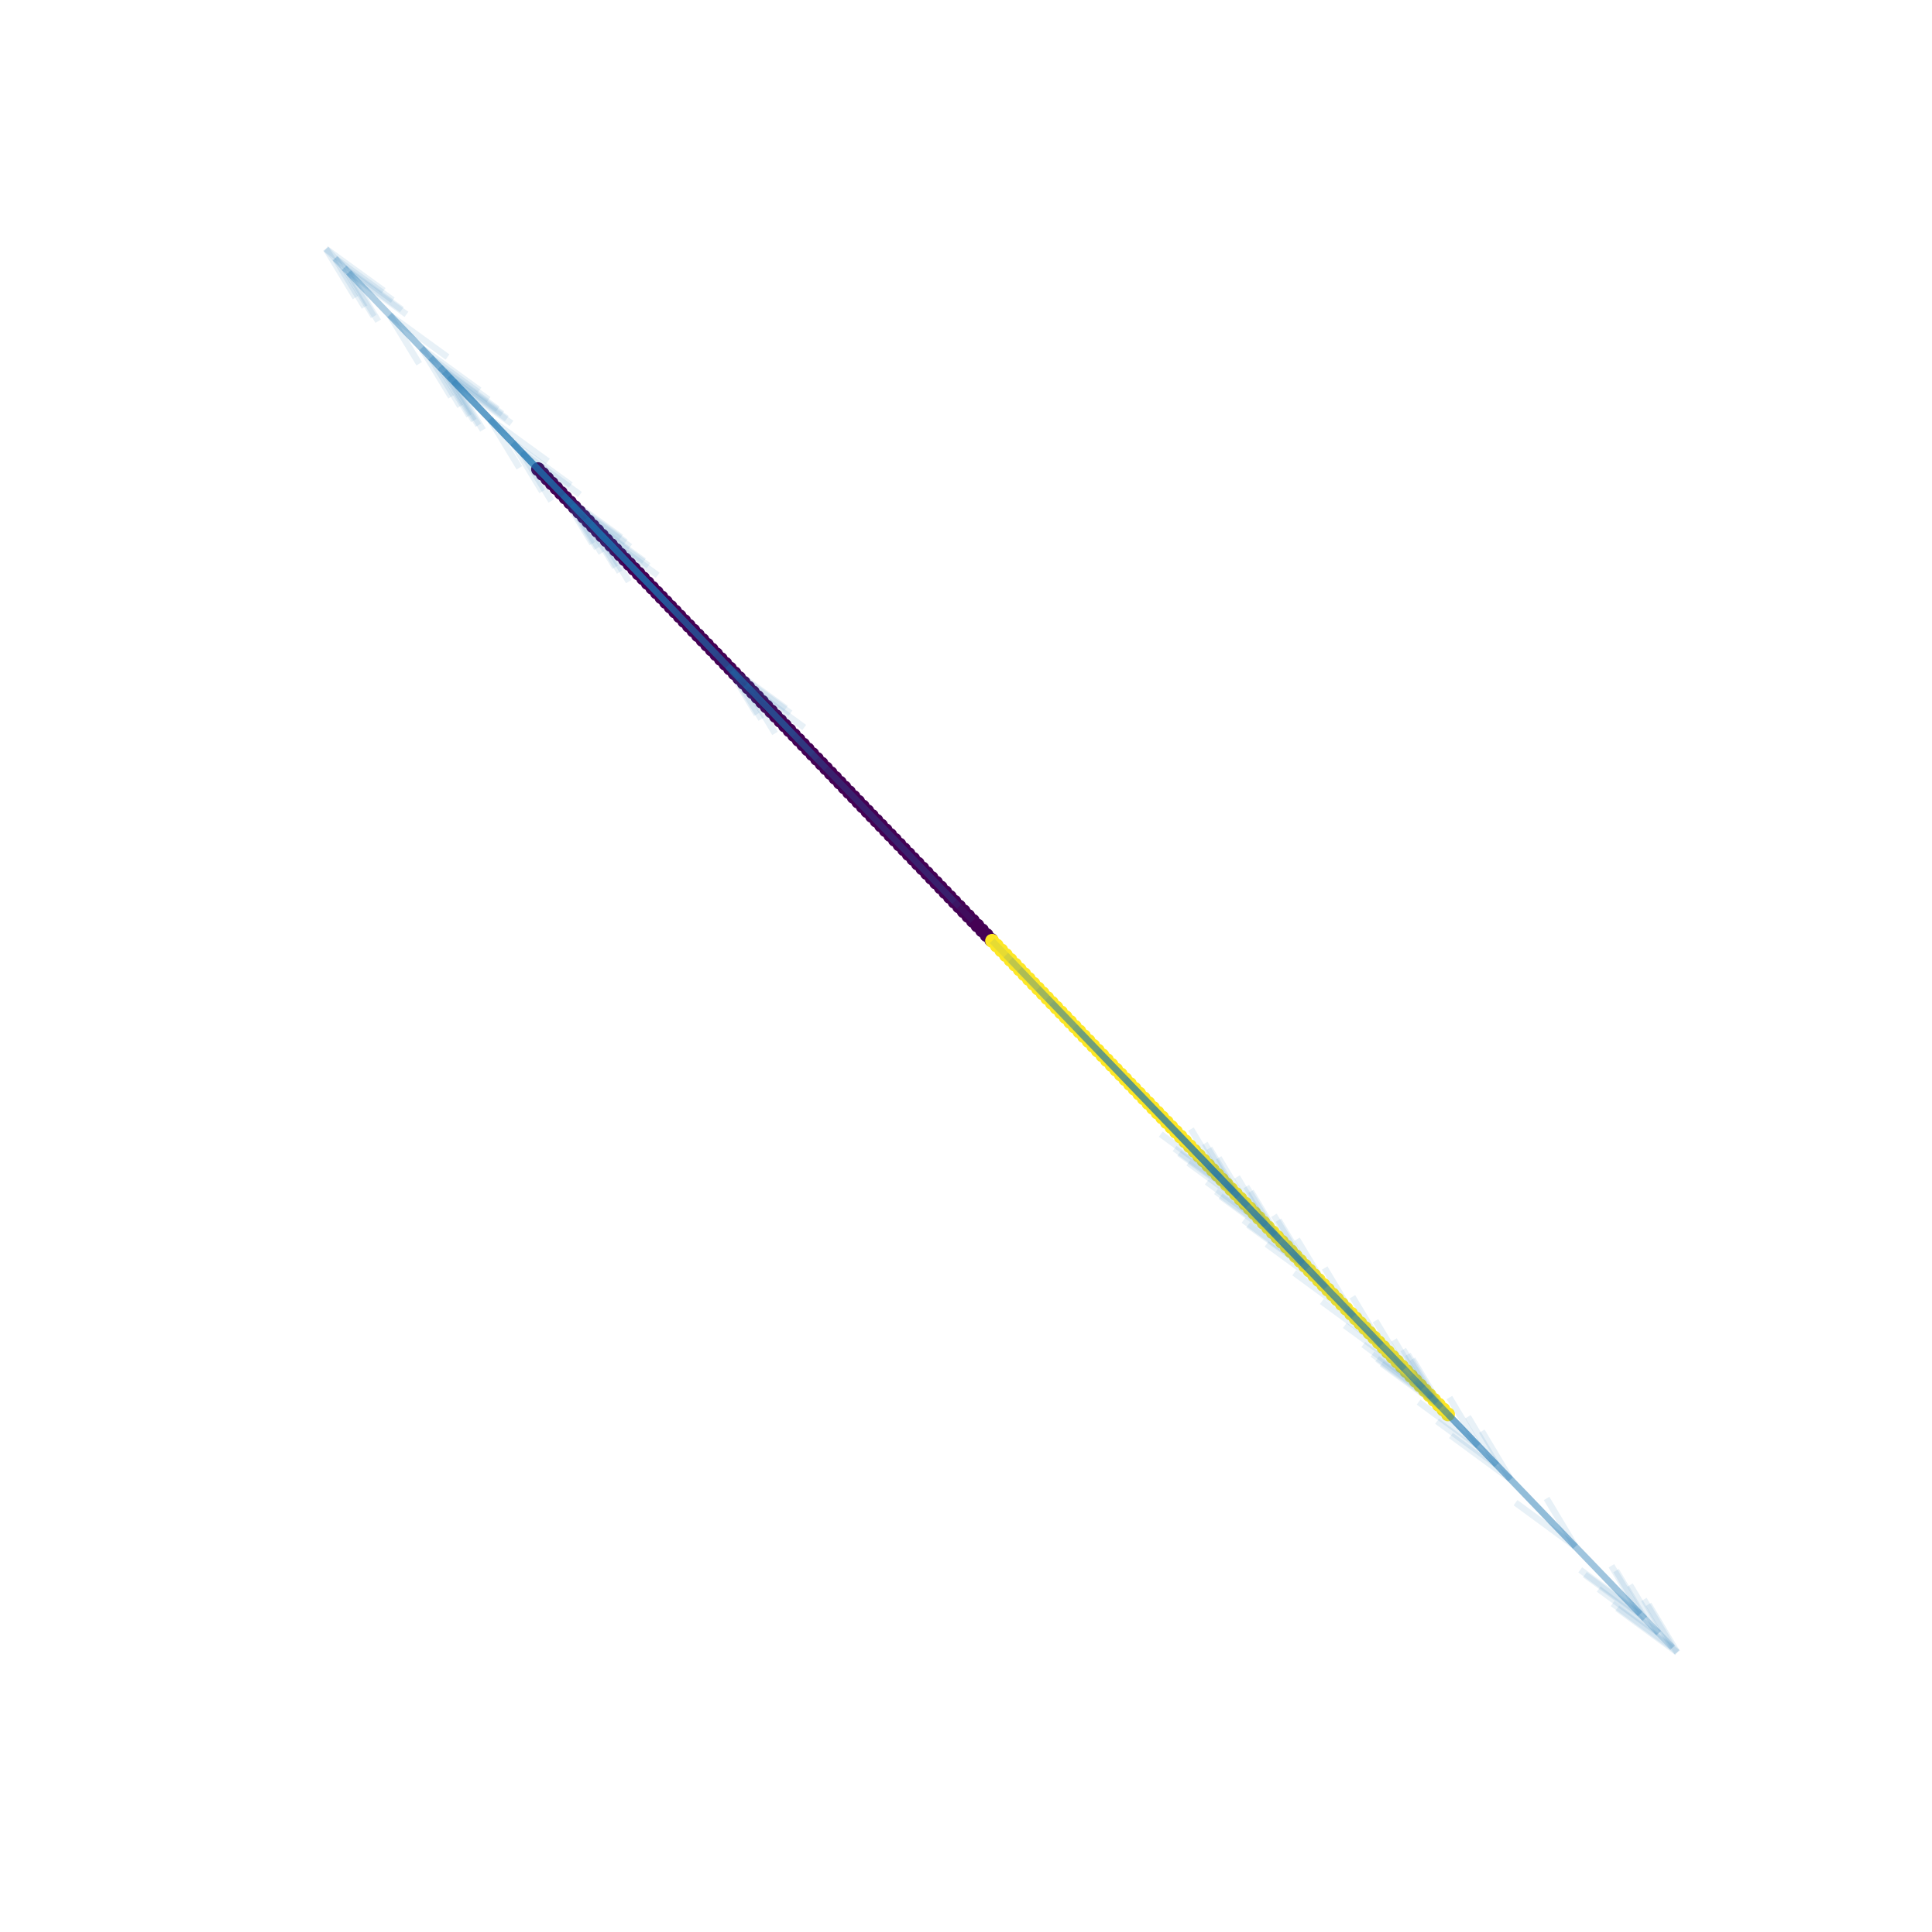

In [ ]:
plot_directed_3d(X,flows, labels, plot_minimal=True,mask_prob=0.8, )